# Environmental Impacts by Neighborhood

## By Ashu Sangar

Data set: [Illegal Dump Sites](https://data.wprdc.org/dataset/allegheny-county-illegal-dump-sites/resource/ee834d8d-ae71-4b3b-b02b-312ba321ff17?view_id=1988368f-ec43-430c-9478-bd31164c1326)

# Illegal Dumpsites

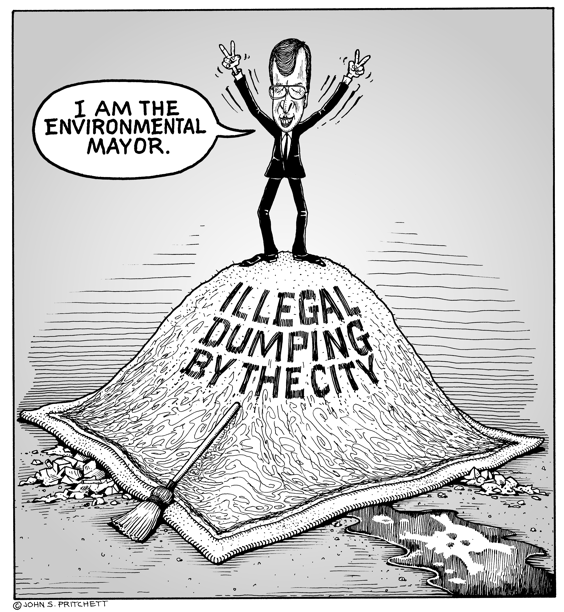

# What does this mean and how are we calculating/what we are measuring

Ilegal dumping is defined as the the disposal of trash generated at one location and disposed of at another location without legal permission. This includes dumping yard waste, appliances, tires and other garbage in alleys, dumpsters, vacant lots and open desert locations. Thus an illegal dumpsite is the exact location where illegal dumping is suspected to be found. Now in terms of how we are measuring this, we found a dataset that shows the amount of garbage found at an illegal dumpsite. The amount of garbage is measured through tons, thus we sort and display the data so that it shows the total amount of garbage found within each illegal dumpsite in each neighborhood in Pittsburgh. Overall, the neighborhoods with the most garbage will be deemed as worse, and the neighborhoods that have the least will be deemed as the best. 

In [130]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd


# load dataset

illegal_dsites = gpd.read_file('illegaldumpsites.csv')

illegal_dsites.head(3)


,site_name,Status,City,Neighborhood,estimated_tons,location_description,latitude,longitude,geometry
0,St. Martin Street,Surveyed,Pittsburgh,Allentown,0.5,,40.42221971,-79.99022525,None
1,Brosville Street,Surveyed,Pittsburgh,Allentown,3,,40.42370101,-79.98657393,None
2,McCain Street,Surveyed,Pittsburgh,Allentown,1,,40.42427063,-79.99022675,None


We see that the neighborhood name is contained in the column labeled "Neighborhood" and the amount of garbage in tons is contained in the "estimated_tons" column. This gives us the metric that is going to be used, whichever neighborgood has the least amount of illegal garbage will be deemed the best. 

In [125]:
# In order to do this, since the Neighborhoods are in alplebetical order, we can use the groupby fuction in pandas in order to tally the total amount of garbage in each neighborhood. 

# create dataframe that simplifies given info

nb_df = pd.DataFrame(columns = ["Street", "City", "Neighborhood", "Total Garbage Tons"])

nb_df["Street"] = illegal_dsites["site_name"]
nb_df["City"] = illegal_dsites["City"]
nb_df["Neighborhood"] = illegal_dsites["Neighborhood"]
nb_df["Total Garbage Tons"] = pd.to_numeric(illegal_dsites["estimated_tons"], errors='coerce')

#display entire dataframe
print(nb_df.head())

              Street        City Neighborhood  Total Garbage Tons
0  St. Martin Street  Pittsburgh    Allentown                 0.5
1   Brosville Street  Pittsburgh    Allentown                 3.0
2      McCain Street  Pittsburgh    Allentown                 1.0
3          Ceres Way  Pittsburgh    Allentown                 0.5
4      Eureka Street  Pittsburgh    Allentown                 0.1


In [126]:
#groupby to show total garbage in each hood'
#groupby to show total tons of each neighborhood + displaying

neighborhood_totals = nb_df.groupby('Neighborhood')['Total Garbage Tons'].sum()

neighborhood_totals.head(1000)

Neighborhood
                           0.0
Allentown                 10.4
Arlington                 17.5
Avalon                     1.0
Banksville                 1.0
                          ... 
Wilkins                    2.3
Wilkins/Monroeville        1.5
Wilkinsburg                9.9
Wilkinsburg/Penn Hills     6.0
Windgap                    4.0
Name: Total Garbage Tons, Length: 153, dtype: float64

Now lets visualize the data better, the main method that would best portray the data is through bar graphs. 


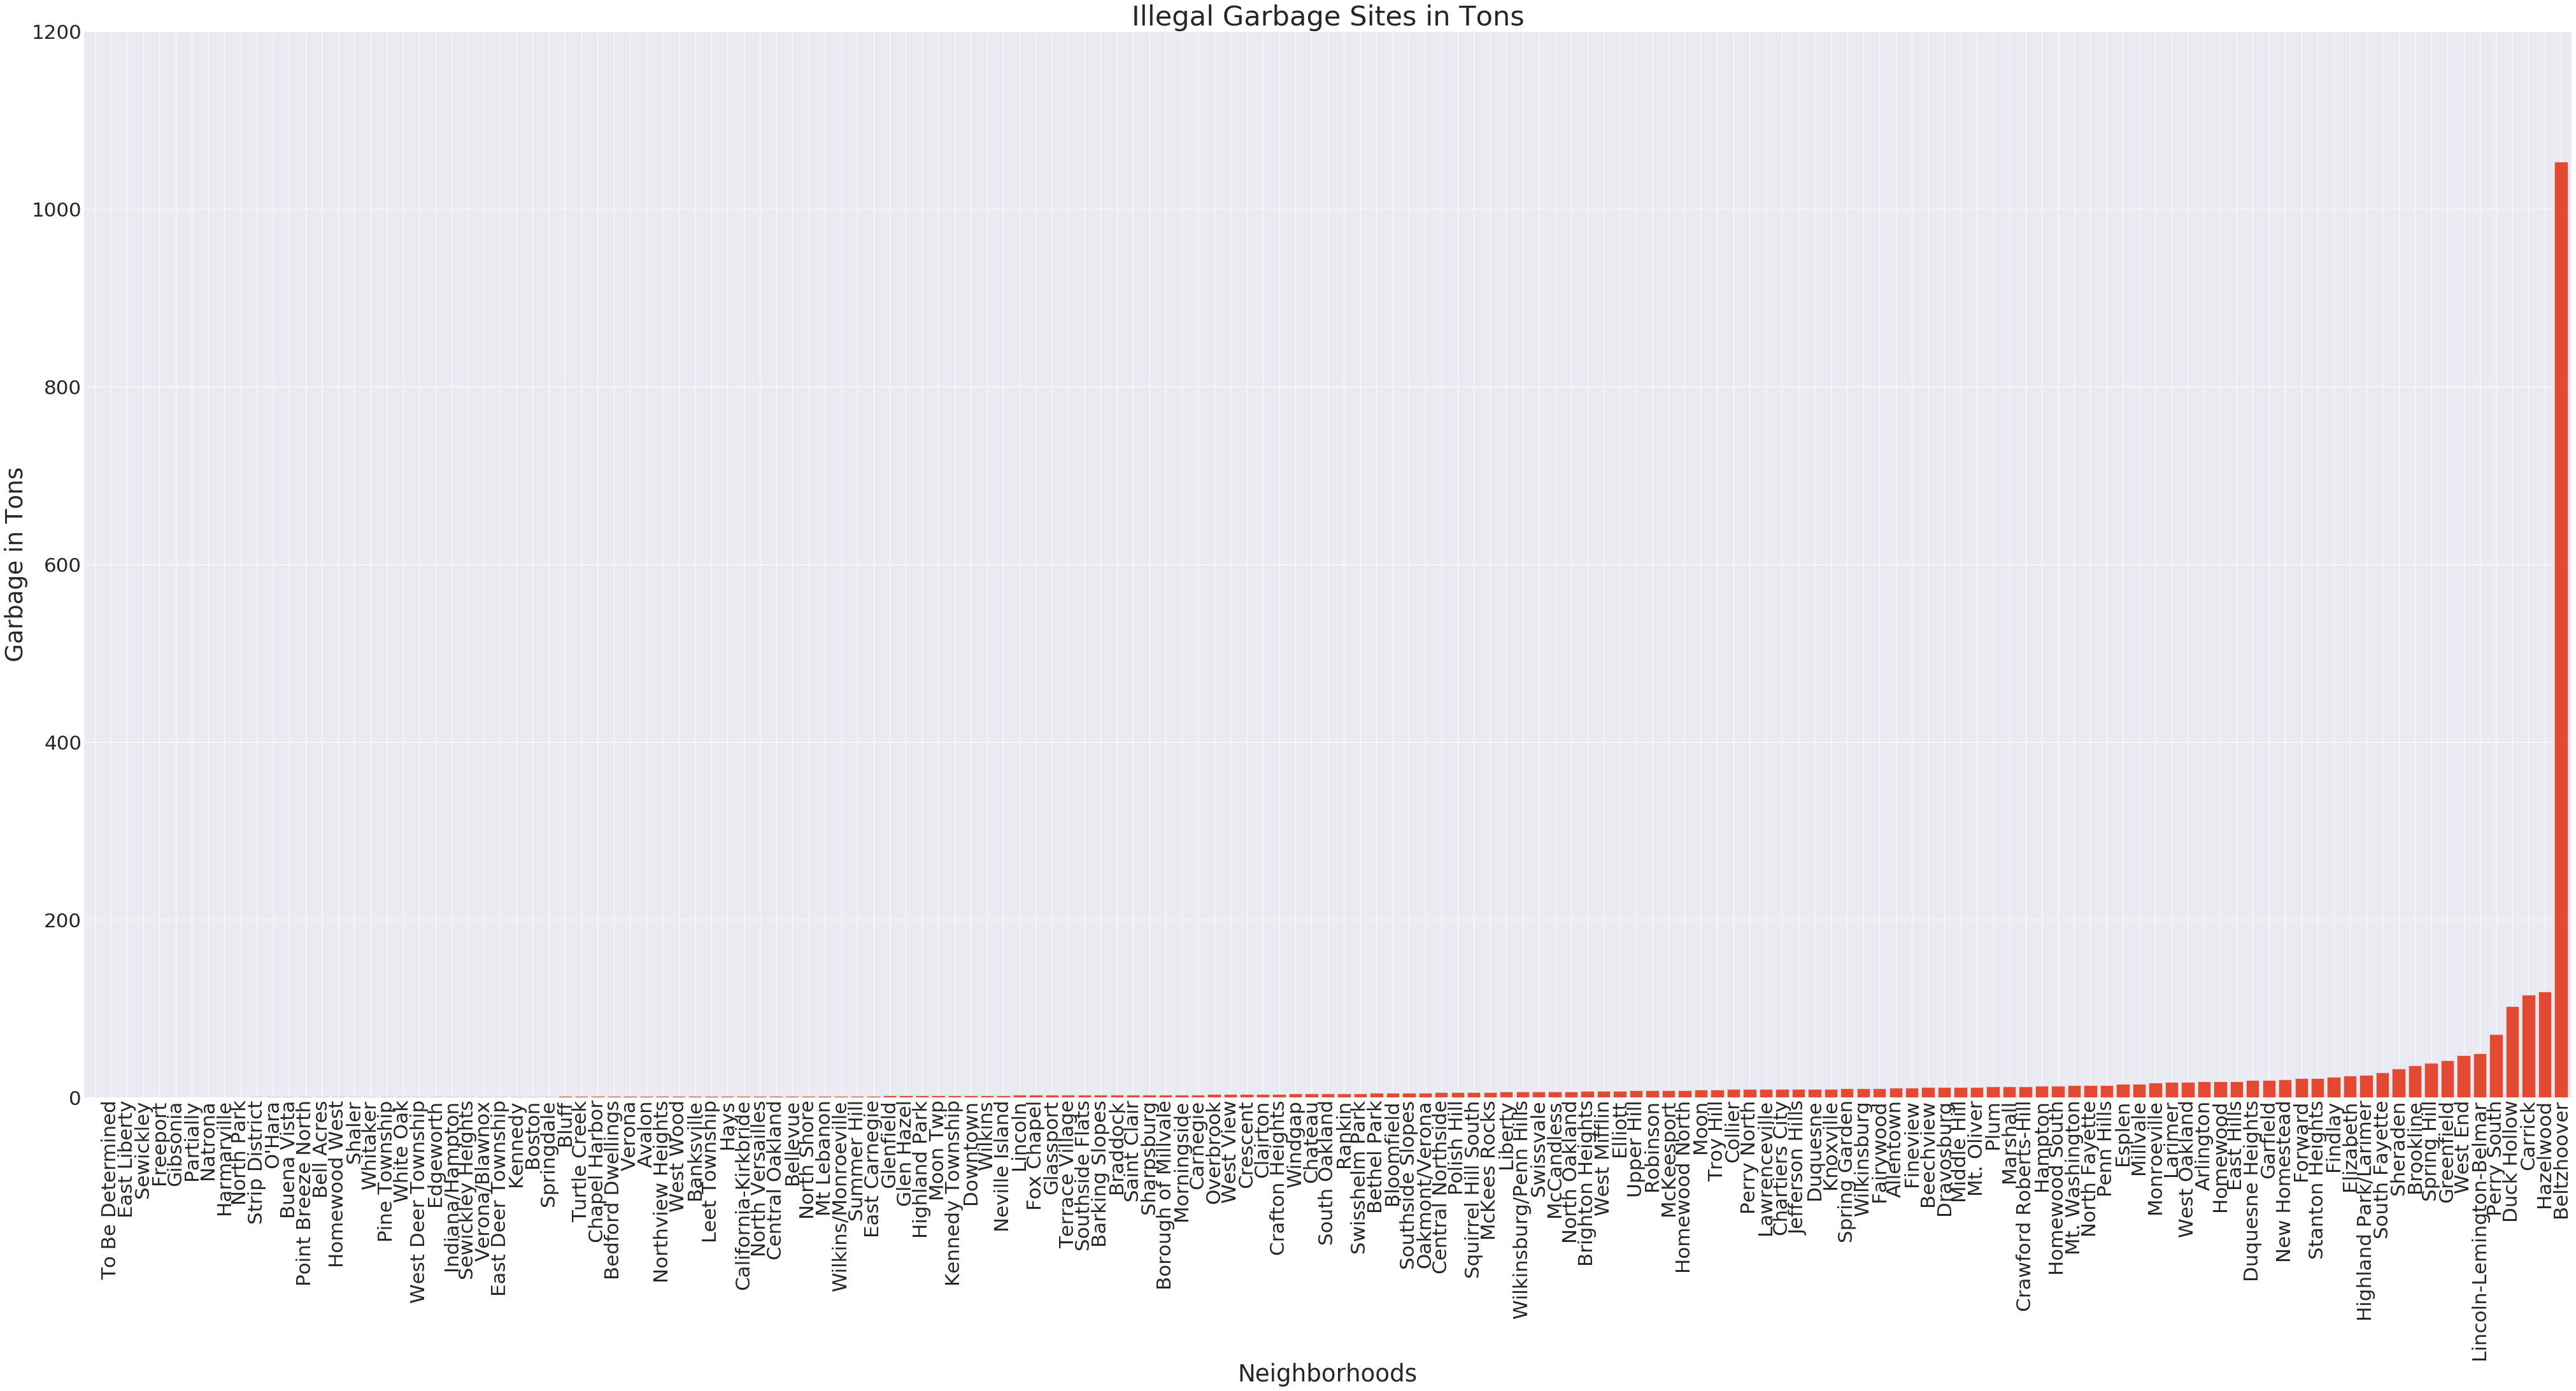

In [141]:
#making the bar graph display data in ascending order 
neighborhood_totals = neighborhood_totals.sort_values(ascending=True)

# creating the bar graph
neighborhood_totals.plot.bar(figsize=[70,30], stacked = True, width = .8)
plt.rcParams.update({'font.size': 30})
plt.title("Illegal Garbage Sites in Tons")
plt.xlabel("Neighborhoods")
plt.ylabel("Garbage in Tons")
plt.style.use('seaborn-darkgrid')


# Conclusions Being Drawn
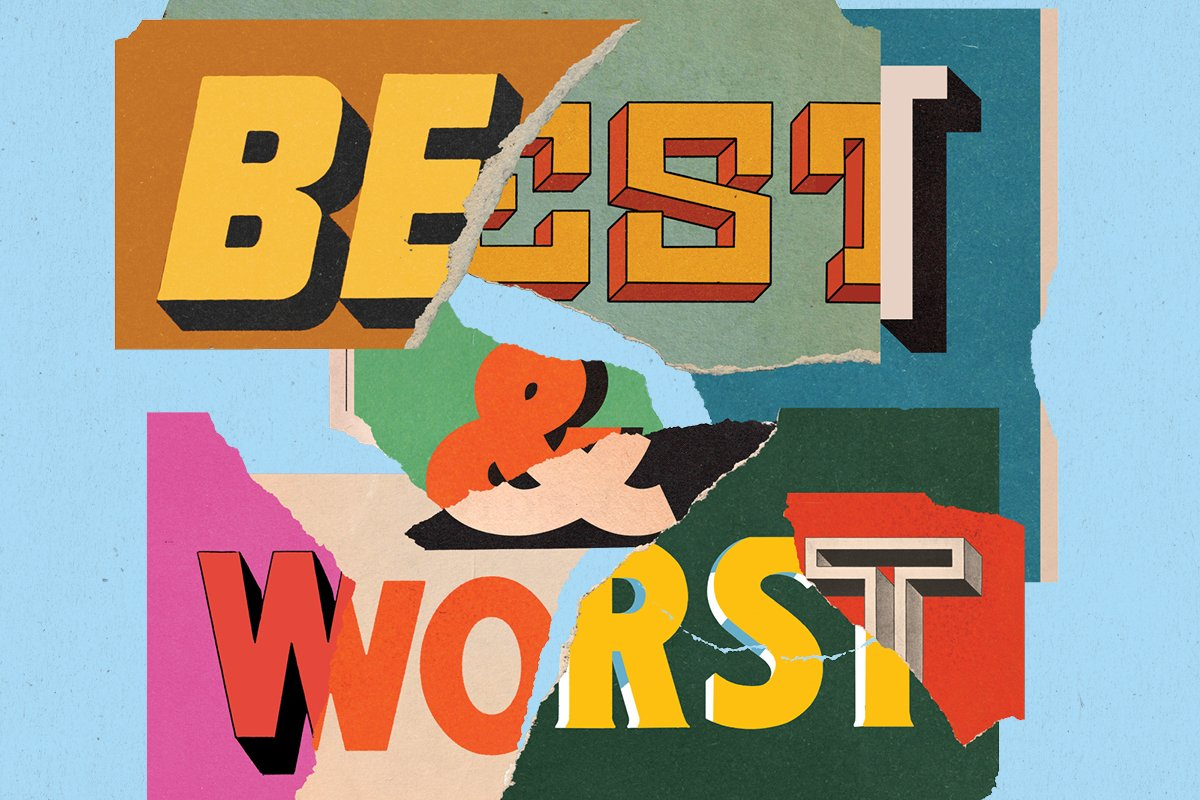

Now that we sorted and displayed the data, it is quite easy to determine which parts of Pittsburgh are better than others soley in terms of how much illegal garbage is contained in each neighborhood. As a result the 5 worst neighborhoods  in Pittsburgh based on the amount of tons of illegal garbage are: 

- 1. Belzhoover
- 2. Hazelhood
- 3. Carrick
- 4. Duck Hollow
- 5. Perry South

Conversely, the best neighborhoods in terms of the total tons of garbage are as follows(there will be more than 5 since there are many neighborhoods that had close to 0 tons of garbage):
- 1. East Liberty
- 2. Sewickley
- 3. Freeport 
- 4. Gibsonia 
- 5. Natrona 
- 6. Harmarville 
- 7. North Park